In [ ]:
import numpy as np
print(np.version.version)
from numpy import loadtxt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
from numpy import diff
import pandas as pn
import math
import scipy.constants as sc
import pickle
import copy
from scipy import interpolate
from matplotlib import rcParams, cycler, cm, rc
plotall = True
overview_plot = True
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show,pcolor
import pandas as pd
import os
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter,FormatStrFormatter, FuncFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from numpy.polynomial import Polynomial
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.lines as mlines
from matplotlib.ticker import LogFormatter

# Folder Paths #

In [ ]:
"---Folder Paths---"


folder_RT_film_cleaned = r"C:\Users\pblah\Data\Navy Beach\FM318\Film\RT\Cleaned"
pathlist_RT_film_cleaned = folderpath(folder_RT_film_cleaned)

folder_RT_film_cleaned_trimmed = r"C:\Users\pblah\Data\Navy Beach\FM318\Film\RT\Cleaned\EDITED"
pathlist_RT_film_cleaned_trimmed = folderpath(folder_RT_film_cleaned_trimmed)

folder_RT_film_pandas = r"C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT"
pathlist_RT_film_pandas = folderpath_csv(folder_RT_film_pandas)



print(pathlist_RT_film_cleaned)
print(pathlist_RT_film_cleaned_trimmed)
print(pathlist_RT_film_pandas)

# RT #

In [ ]:
fig,ax = plt.subplots(figsize=(12,12), dpi = 500)

colours = ['dodgerblue','dodgerblue']
RT_type = ['cooldown','warmup']

for i,data in enumerate(pathlist_RT_film_cleaned_trimmed):
    
    #print("i",i)
    #print("data",data)

    dataextracted = dataextractorRT(data)
    temperature = dataextracted[0]
    resistance2pt = dataextracted[1]
    resitivity2pt = resistance2pt *22.86E-9*(np.pi/np.log(2))*1E2*1E6 #Resitivity formula
    
    resistance4pt = dataextracted[3]
    print(resistance4pt)
    resitivity4pt = resistance4pt *22.86E-9*(np.pi/np.log(2))*1E2*1E6 #Resitivity formula
    print(resitivity4pt)
    #plt.plot(temperature,resistance4pt,label = labels[i],color = colours_1K[i])
    plt.plot(temperature,resitivity4pt,color = colours[i])
    pd.DataFrame({'temperature':temperature,'resistance2pt':resistance2pt,'resitivity2pt':resitivity2pt,'resistance4pt':resistance4pt,'resitivity4pt':resitivity4pt}).to_csv(r'C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\ ' + str(i) + '_' + 'FM318_Film_RvsT' + '_' +  str(RT_type[i]) +  '.csv')
    pd.DataFrame({'temperature':temperature,'resistance2pt':resistance2pt,'resitivity2pt':resitivity2pt,'resistance4pt':resistance4pt,'resitivity4pt':resitivity4pt}).to_csv(r'C:\Users\pblah\Data\Navy Beach\Data for Combined Plots NNO\RTs\1st Set\ ' + 
    'FM318' + '_' + str(i) + '_' + 'Film_RvsT' + '_' + str(RT_type[i]) + '.csv')
    pd.DataFrame({'temperature':temperature,'resistance2pt':resistance2pt,'resitivity2pt':resitivity2pt,'resistance4pt':resistance4pt,'resitivity4pt':resitivity4pt}).to_csv(r'C:\Users\pblah\Data\Navy Beach\Data for Combined Plots NNO\RTs\2nd Set\ ' + 
    'FM318' + '_' + str(i) + '_' + 'Film_RvsT' + '_' + str(RT_type[i]) + '.csv')
    
plt.yscale('log') 
ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)
#ax.spines["left"].set_bounds(-3.5,3.5)
#ax.spines["right"].set_bounds(-3.5,3.5)
#ax.spines["top"].set_position(['data',3.5])
#ax.spines["bottom"].set_position(['data',-3.5])


ax.tick_params(axis='x', which='major', labelsize=40, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis='y', which='major', labelsize=40, length = 20, width = 2, direction = 'in', pad = 10, left = True)
ax.tick_params(axis='y', which='minor', labelsize=40, length = 20, width = 2, direction = 'in', pad = 10, left = True)


plt.title("FM318 Film RT",fontsize = 40, pad = 20)
plt.ylabel(r'$\rho (\mu\Omega\cdot \mathrm{cm})$',fontsize=40, labelpad = 20)
plt.xlabel("T(K)",fontsize=40, labelpad = 20)


plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318_Film_RT.pdf",bbox_inches = "tight", format = "pdf")  
plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318_Film_RT.png",bbox_inches = "tight")  
plt.show()

### Experimenting with log scales ###

#plt.yscale('log')
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(sci_notation))
#ax.get_yaxis().set_minor_formatter(ticker.LogFormatter())
#locmin = matplotlib.ticker.LogLocator(subs='all')
#locmax = matplotlib.ticker.LogLocator(subs='all', numticks = 20) 
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_locator(locmax)
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.LogFormatterSciNotation(base=10))
#ax.get_yaxis().set_minor_formatter(matplotlib.ticker.LogFormatterSciNotation(base=10))
#locmax = matplotlib.ticker.LogLocator(base=10.0, subs = (1,2,3,4,5,6,7,8,9,11))
#locmin = matplotlib.ticker.LogLocator(numticks=12)
#ax.yaxis.set_major_locator(locmax)
#ax.yaxis.set_minor_locator(locmin)
#plt.yticks(fontsize=20)
#plt.xticks(fontsize=20)
#plt.xlim(160,300)
#plt.ylim(1E3,1.5E3)
#ax.set_xticks(range(0,320,50))
#ax.ticklabel_format(axis = 'both',style = 'sci')
#ax.set_yticks(np.logspace(3,4,num=3,base=10),minor=False)
#ax.get_yaxis().set_minor_formatter(matplotlib.ticker.LogFormatterSciNotation(base=10,minor_thresholds=(3,1)))
#ax.tick_params(axis='both', which='major', labelsize=25)
#ax.tick_params(axis='both', which='minor', labelsize=15)
#ax.get_yaxis().set_minor_formatter(matplotlib.ticker.FormatStrFormatter('%.2e'))

[136.64844876 136.63308471 136.63671507 ... 731.2882283  731.2882283
 731.2882283 ]
[1415.81120022 1415.65201373 1415.6896278  ... 7576.85925904 7576.85925904
 7576.85925904]
[726.44360414 726.41549237 726.44360414 ... 137.24965692 137.24406077
 137.28361133]
[7526.66422788 7526.37296255 7526.66422788 ... 1422.04030307 1421.98232158
 1422.39210397]


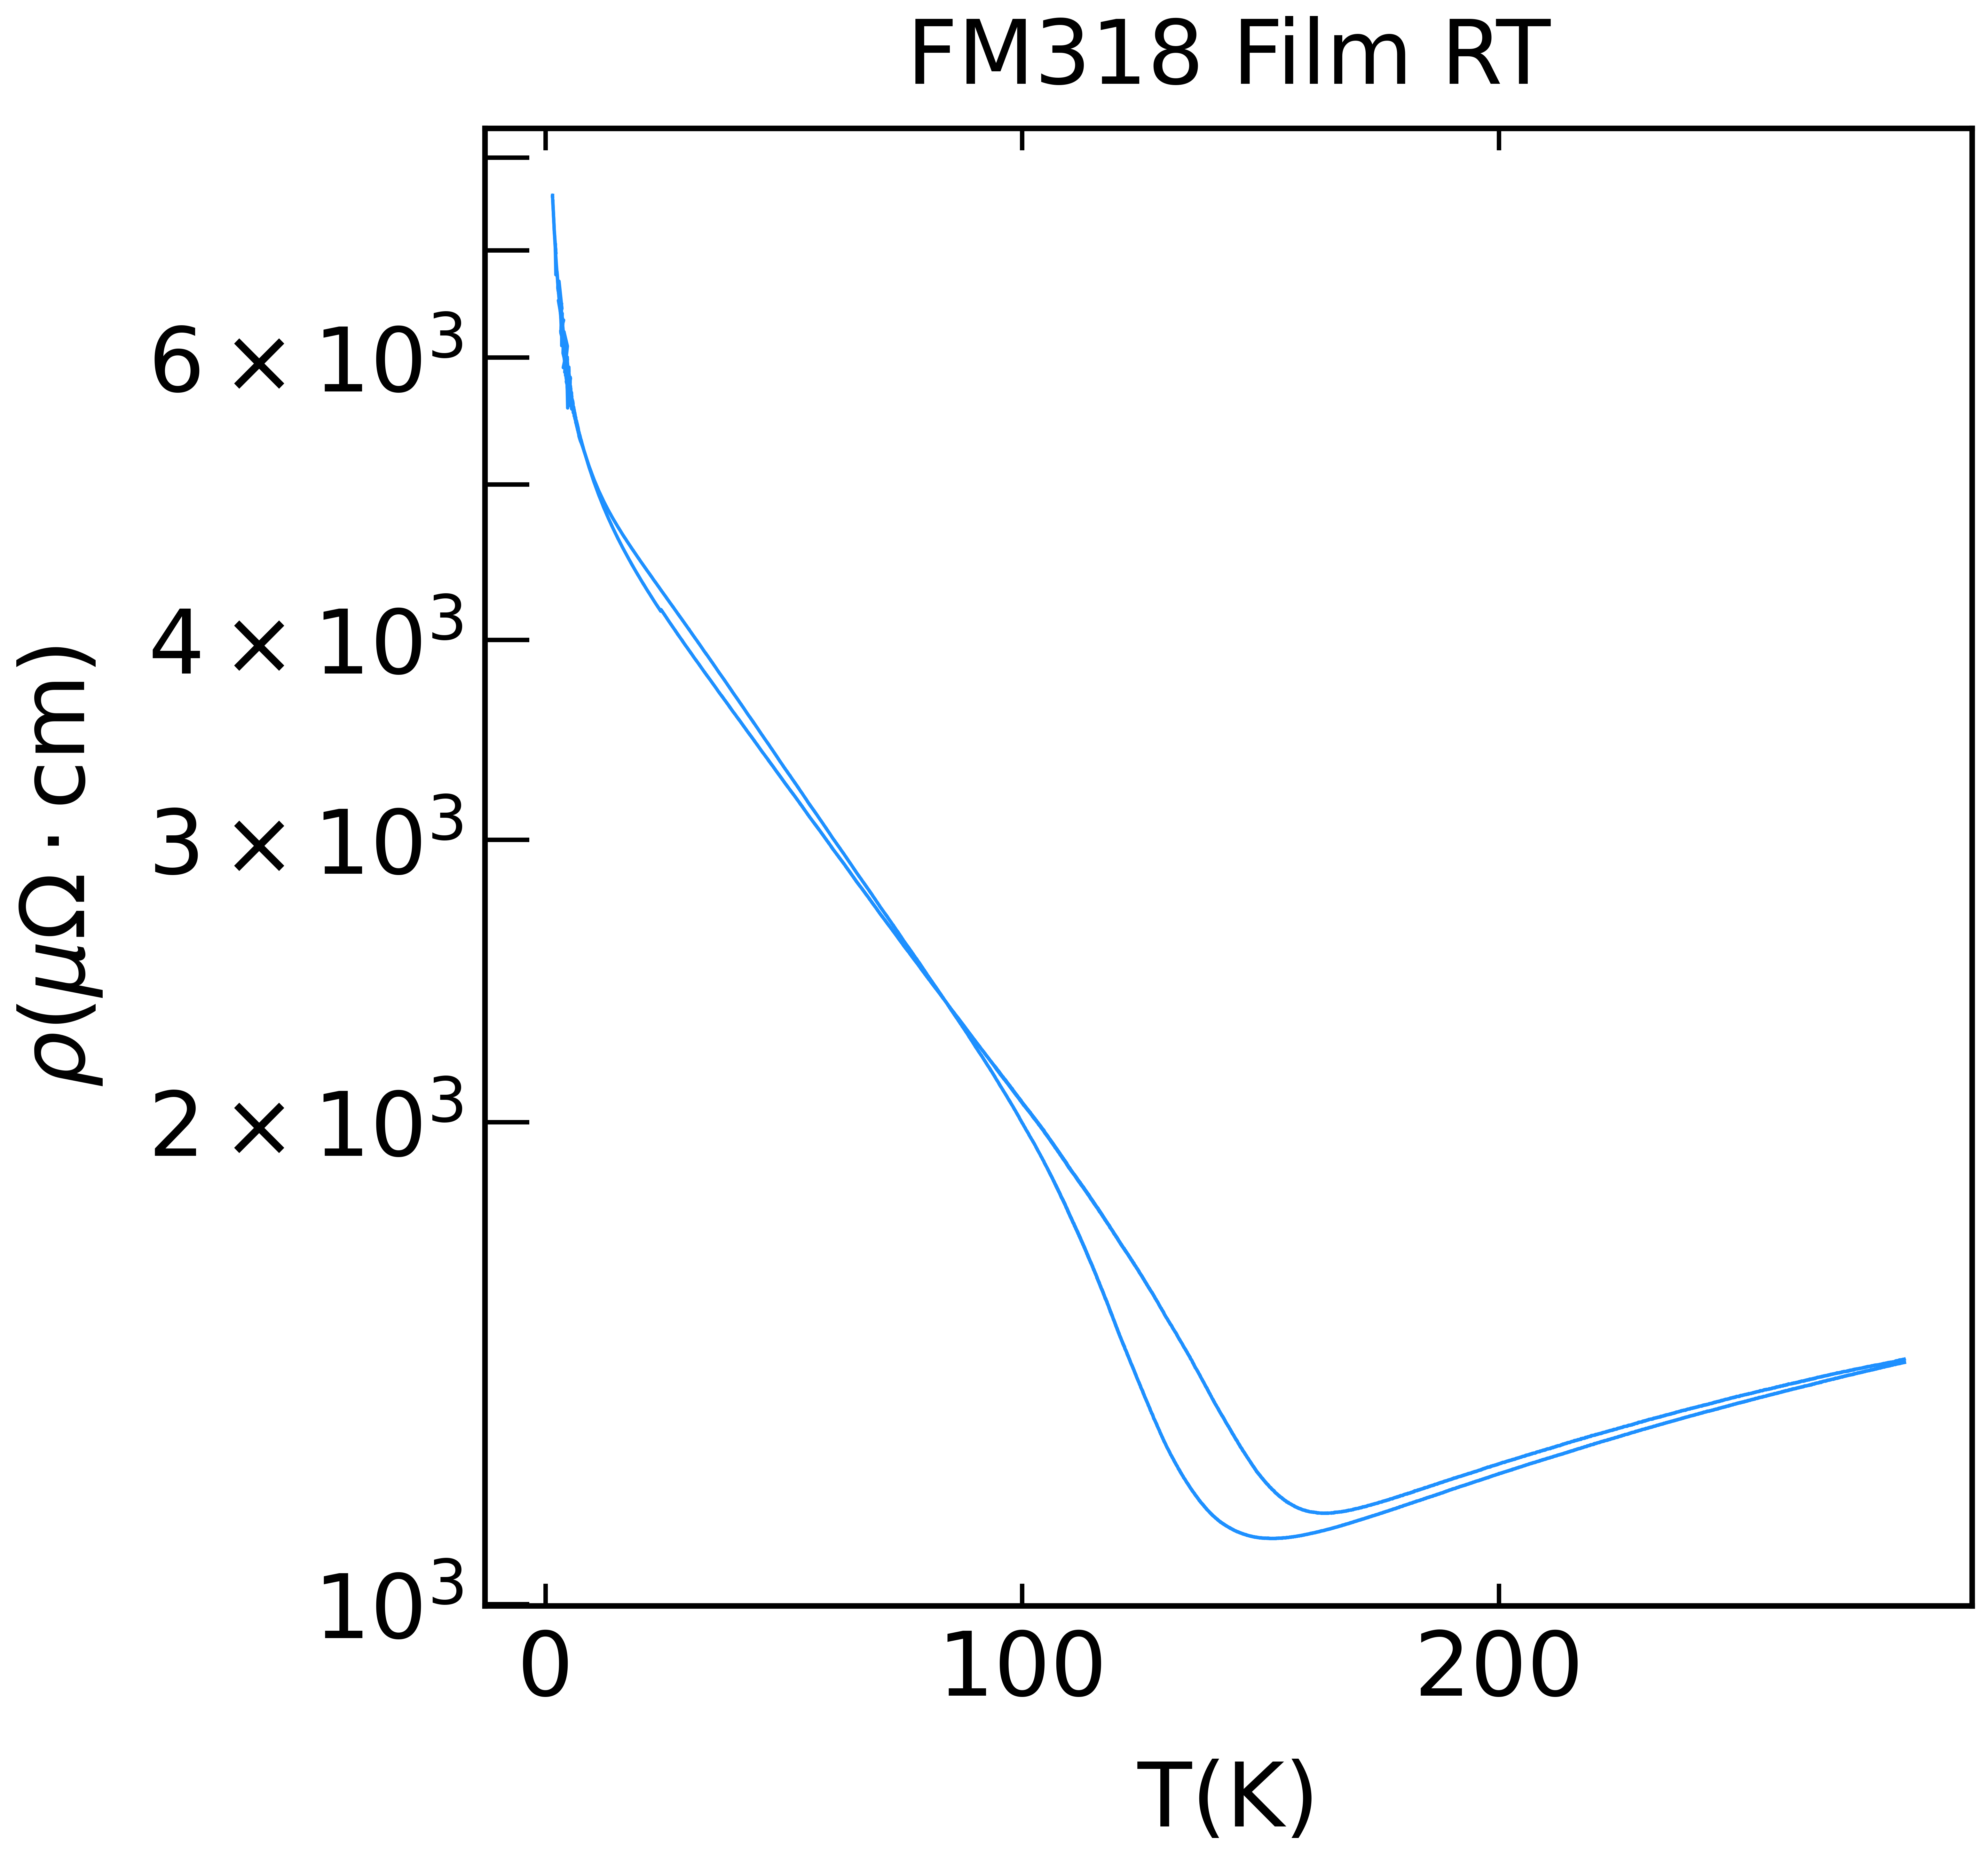

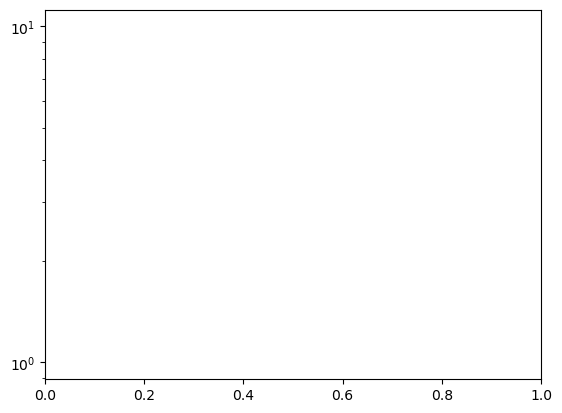

In [8]:
fig,ax = plt.subplots(figsize=(12,12), dpi = 500)

colours = ['dodgerblue','dodgerblue']
RT_type = ['cooldown','warmup']

for i,data in enumerate(pathlist_RT_film_cleaned_trimmed):
    
    #print("i",i)
    #print("data",data)

    dataextracted = dataextractorRT(data)
    temperature = dataextracted[0]
    resistance2pt = dataextracted[1]
    resitivity2pt = resistance2pt *22.86E-9*(np.pi/np.log(2))*1E2*1E6
    
    resistance4pt = dataextracted[3]
    print(resistance4pt)
    resitivity4pt = resistance4pt *22.86E-9*(np.pi/np.log(2))*1E2*1E6
    print(resitivity4pt)
    #plt.plot(temperature,resistance4pt,label = labels[i],color = colours_1K[i])
    plt.plot(temperature,resitivity4pt,color = colours[i])
    pd.DataFrame({'temperature':temperature,'resistance2pt':resistance2pt,'resitivity2pt':resitivity2pt,'resistance4pt':resistance4pt,'resitivity4pt':resitivity4pt}).to_csv(r'C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\ ' + str(i) + '_' + 'FM318_Film_RvsT' + '_' +  str(RT_type[i]) +  '.csv')
    pd.DataFrame({'temperature':temperature,'resistance2pt':resistance2pt,'resitivity2pt':resitivity2pt,'resistance4pt':resistance4pt,'resitivity4pt':resitivity4pt}).to_csv(r'C:\Users\pblah\Data\Navy Beach\Data for Combined Plots NNO\RTs\1st Set\ ' + 
    'FM318' + '_' + str(i) + '_' + 'Film_RvsT' + '_' + str(RT_type[i]) + '.csv')
    pd.DataFrame({'temperature':temperature,'resistance2pt':resistance2pt,'resitivity2pt':resitivity2pt,'resistance4pt':resistance4pt,'resitivity4pt':resitivity4pt}).to_csv(r'C:\Users\pblah\Data\Navy Beach\Data for Combined Plots NNO\RTs\2nd Set\ ' + 
    'FM318' + '_' + str(i) + '_' + 'Film_RvsT' + '_' + str(RT_type[i]) + '.csv')
    
plt.yscale('log') 
ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)
#ax.spines["left"].set_bounds(-3.5,3.5)
#ax.spines["right"].set_bounds(-3.5,3.5)
#ax.spines["top"].set_position(['data',3.5])
#ax.spines["bottom"].set_position(['data',-3.5])


ax.tick_params(axis='x', which='major', labelsize=40, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis='y', which='major', labelsize=40, length = 20, width = 2, direction = 'in', pad = 10, left = True)
ax.tick_params(axis='y', which='minor', labelsize=40, length = 20, width = 2, direction = 'in', pad = 10, left = True)


plt.title("FM318 Film RT",fontsize = 40, pad = 20)
plt.ylabel(r'$\rho (\mu\Omega\cdot \mathrm{cm})$',fontsize=40, labelpad = 20)
plt.xlabel("T(K)",fontsize=40, labelpad = 20)


#plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318_Film_RT.pdf",bbox_inches = "tight", format = "pdf")  
#plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318_Film_RT.png",bbox_inches = "tight")  
plt.show()



plt.yscale('log')
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(sci_notation))
#ax.get_yaxis().set_minor_formatter(ticker.LogFormatter())
#locmin = matplotlib.ticker.LogLocator(subs='all')
#locmax = matplotlib.ticker.LogLocator(subs='all', numticks = 20) 
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_locator(locmax)
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.LogFormatterSciNotation(base=10))
#ax.get_yaxis().set_minor_formatter(matplotlib.ticker.LogFormatterSciNotation(base=10))
#locmax = matplotlib.ticker.LogLocator(base=10.0, subs = (1,2,3,4,5,6,7,8,9,11))
#locmin = matplotlib.ticker.LogLocator(numticks=12)
#ax.yaxis.set_major_locator(locmax)
#ax.yaxis.set_minor_locator(locmin)
#plt.yticks(fontsize=20)
#plt.xticks(fontsize=20)
#plt.xlim(160,300)
#plt.ylim(1E3,1.5E3)
#ax.set_xticks(range(0,320,50))
#ax.ticklabel_format(axis = 'both',style = 'sci')
#ax.set_yticks(np.logspace(3,4,num=3,base=10),minor=False)
#ax.get_yaxis().set_minor_formatter(matplotlib.ticker.LogFormatterSciNotation(base=10,minor_thresholds=(3,1)))
#ax.tick_params(axis='both', which='major', labelsize=25)
#ax.tick_params(axis='both', which='minor', labelsize=15)
#ax.get_yaxis().set_minor_formatter(matplotlib.ticker.FormatStrFormatter('%.2e'))






## Combining into a Single Curve ##

In [ ]:
labels = ["FM318_Film"]
samples_dict = {}

single_curves_list_temperature = []
single_curves_list_resitivity4pt = []
    
for i,path in enumerate(pathlist_RT_film_pandas): 
    
    x = pd.read_csv(path)
    Temperature = pd.DataFrame(x).temperature.values.tolist()
    Resitivity_4pt = pd.DataFrame(x).resitivity4pt.values.tolist()

    single_curves_list_temperature.append(Temperature)
    single_curves_list_resitivity4pt.append(Resitivity_4pt)
    
    
### Exporting Single Curves as Dataframes ###    
for i, name in enumerate(labels):
    
    samples_dict[labels[i] + '_' + 't' + '_' + 'full'] = single_curves_list_temperature[i*2] + single_curves_list_temperature[(i*2)+1]
    samples_dict[labels[i] + '_' + 'r4pt' + '_' + 'full'] = single_curves_list_resitivity4pt[i*2] + single_curves_list_resitivity4pt[(i*2)+1]    

    pd.DataFrame({'temperature':samples_dict[labels[i] + '_' + 't' + '_' + 'full'],'resitivity4pt':samples_dict[labels[i] + '_' + 'r4pt' + '_' + 'full']}).to_csv(r'C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\Full_Curve\ ' + 
    str(labels[0]) + '_' + 'RvsT_Full' + '.csv')
